In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

# 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr['poverty_rate'].value_counts(dropna = False)

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
74.8       1
60.7       1
84.3       1
77.4       1
57.2       1
Name: poverty_rate, Length: 771, dtype: int64

In [5]:
# INSTRUCTION-1: replace the "-" with zero.

pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [6]:
pr['poverty_rate'].value_counts()

0       1464
0.0      201
6.7      129
7.4      129
10       128
        ... 
83         1
77.8       1
88         1
86.1       1
81.9       1
Name: poverty_rate, Length: 771, dtype: int64

In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
#    INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).

pr['poverty_rate'] = pd.to_numeric(pr['poverty_rate'])

In [9]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [10]:
# INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)

# INSTRUCTION-3.a.1 : Plot With Pandas Built in method:

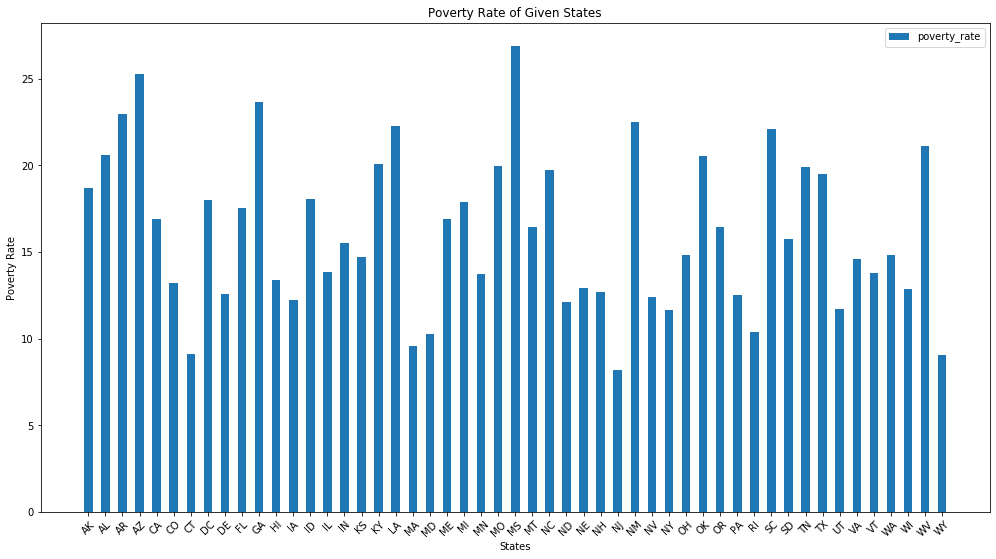

In [11]:
aaa = pr.groupby('Geographic Area')['poverty_rate'].mean()
fig, axes = plt.subplots(figsize=(17,9))
axes.bar(aaa.index, aaa.values, width = 0.5, label = 'poverty_rate')
axes.set_title("Poverty Rate of Given States")
axes.set_xlabel('States')
axes.set_ylabel('Poverty Rate')
#axes.set_xticks(x_pos)
axes.set_xticklabels(aaa.index, rotation=45)
axes.legend();

In [12]:
# INSTRUCTION-3.a.2 Plot Sorted Values With Pandas Built in method:

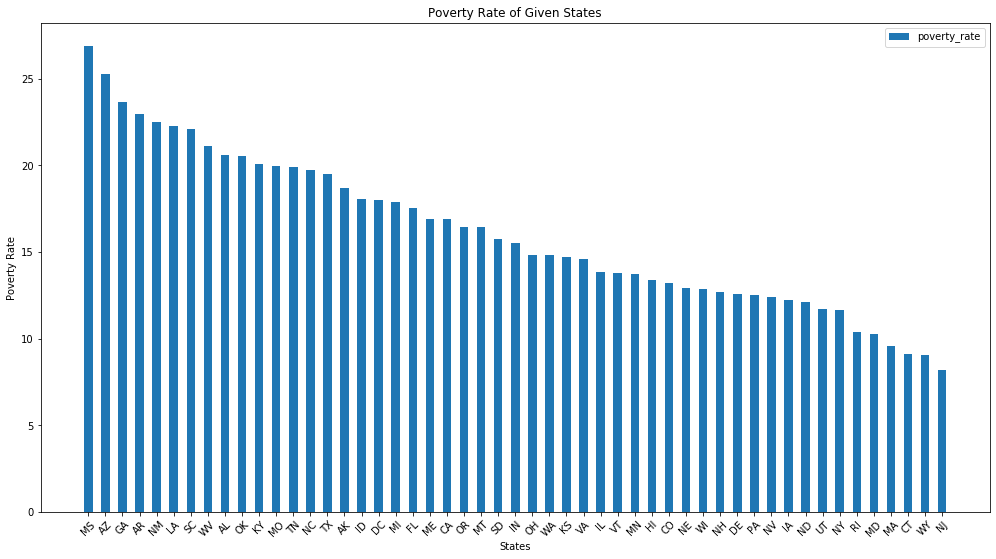

In [13]:
aaa = pr.groupby('Geographic Area')['poverty_rate'].mean()
aaa3 = pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False)
fig, axes = plt.subplots(figsize=(17,9))
axes.bar(aaa3.index, aaa3.values, width = 0.5, label = 'poverty_rate')
axes.set_title("Poverty Rate of Given States")
axes.set_xlabel('States')
axes.set_ylabel('Poverty Rate')
#axes.set_xticks(x_pos)
axes.set_xticklabels(aaa3.index, rotation=45)
axes.legend();

In [14]:
#  INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:

In [15]:
#  INSTRUCTION-3.c : Plot Sorted Values With Seaborn

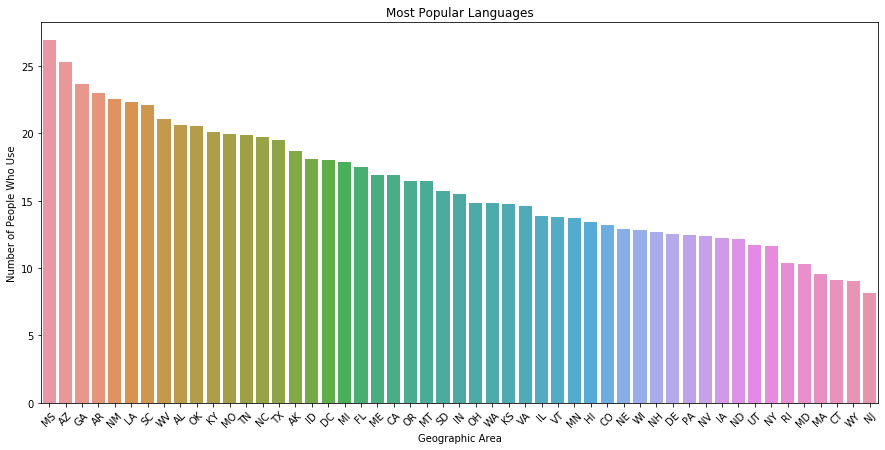

In [16]:
aaa3 = pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=aaa3.index, y = aaa3.values, data = pr)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(aaa3.index, rotation=45);

# 2. Most common 15 Name or Surname of killed people

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
kill.name.value_counts()

TK TK                          49
Michael Brown                   2
Eric Harris                     2
Daquan Antonio Westbrook        2
TK Tk                           2
                               ..
Earl Pinckney                   1
Thad Demarco Hale               1
Antonio Arturo Perez Garcia     1
Walter Lynde                    1
David  Cook                     1
Name: name, Length: 2481, dtype: int64

In [19]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [20]:
pairs

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2529      [Brian, J., Skinner]
2530      [Rodney, E., Jacobs]
2532    [Dennis, W., Robinson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2486, dtype: object

In [21]:
pairs.dtype

dtype('O')

In [22]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [23]:
pairs 

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2529      [Brian, J., Skinner]
2530      [Rodney, E., Jacobs]
2532    [Dennis, W., Robinson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2486, dtype: object

In [24]:
df = pd.DataFrame(pairs)

In [25]:
df['len']=df.name.apply(lambda x:len(x)) # isim uzunluklarini almak icin

In [26]:
df['len_new']=df.name.apply(len)

In [27]:
df.head()

,name,len,len_new
0,"[Tim, Elliot]",2,2
1,"[Lewis, Lee, Lembke]",3,3
2,"[John, Paul, Quintero]",3,3
3,"[Matthew, Hoffman]",2,2
4,"[Michael, Rodriguez]",2,2


In [28]:
df.len.value_counts(dropna = False)

2    1602
3     836
4      48
Name: len, dtype: int64

In [29]:
two_names = df.name[df.len==2]

In [30]:
two_names

0                    [Tim, Elliot]
3               [Matthew, Hoffman]
4             [Michael, Rodriguez]
7                 [Brock, Nichols]
8                 [Autumn, Steele]
                   ...            
2526    [Sergio, Velasco-Martinez]
2527             [Matthew, Folden]
2528         [Alejandro, Alvarado]
2533              [Isaiah, Tucker]
2534               [Dwayne, Jeune]
Name: name, Length: 1602, dtype: object

In [31]:
three_names = df.name[df.len==3]

In [32]:
three_names

1            [Lewis, Lee, Lembke]
2          [John, Paul, Quintero]
5           [Kenneth, Joe, Brown]
6         [Kenneth, Arnold, Buck]
9             [Leslie, Sapp, III]
                  ...            
2517    [Michael, Joseph, Harris]
2523        [Kesharn, K., Burney]
2529         [Brian, J., Skinner]
2530         [Rodney, E., Jacobs]
2532       [Dennis, W., Robinson]
Name: name, Length: 836, dtype: object

In [33]:
four_names = df.name[df.len==4]

In [34]:
four_names

12        [Hashim, Hanif, Ibn, Abdul-Rasheed]
14      [Omarr, Julian, Maximillian, Jackson]
47      [Miguel, Angel, de, Santos-Rodriguez]
54            [Jose, Antonio, Espinoza, Ruiz]
78               [Francis, Murphy, Rose, III]
87                [Jimmy, Ray, Robinson, Jr.]
89            [Paul, Alfred, Eugene, Johnson]
113               [Howard, Brent, Means, Jr.]
144              [Crystal, Lee, Miley, Harry]
145           [Ernesto, Javiar, Canepa, Diaz]
223                  [Walter, J., Brown, III]
471                [Cesar, A., Limon, Juarez]
603               [Richard, Dean, Shull, Jr.]
610        [Hector, Rene, Sorriano, Gonzalez]
669                [Jose, Ramon, Damiani, Jr]
796            [Miguel, Angel, Marin, Galena]
816             [Jerry, Michael, Graham, Jr.]
1108              [Ali, Eisa, Abdalla, Yahia]
1118           [Shawn, Henry, Allen, Dickens]
1174            [John, Charles, "JC", Graham]
1183           [Manford, "Butch", Moore, Jr.]
1241          [Robert, Morgan, Gar

In [35]:
a, b = zip(*two_names)

In [36]:
a[:5]

('Tim', 'Matthew', 'Michael', 'Brock', 'Autumn')

In [37]:
b[:5]

('Elliot', 'Hoffman', 'Rodriguez', 'Nichols', 'Steele')

In [38]:
c, d, e = zip(*three_names)

In [39]:
c[:5]

('Lewis', 'John', 'Kenneth', 'Kenneth', 'Leslie')

In [40]:
f, g, h, i = zip(*four_names)

In [41]:
f[:5]

('Hashim', 'Omarr', 'Miguel', 'Jose', 'Francis')

In [42]:
total_list = a+b+c+d+e+f+g+h+i

In [43]:
len(total_list)

5904

In [44]:
name_count = Counter(total_list)

In [45]:
most_common_names = name_count.most_common(15)

In [46]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [47]:
x, y = zip(*most_common_names)

In [48]:
x, y = list(x), list(y) # tuple yerine list olmasi icin

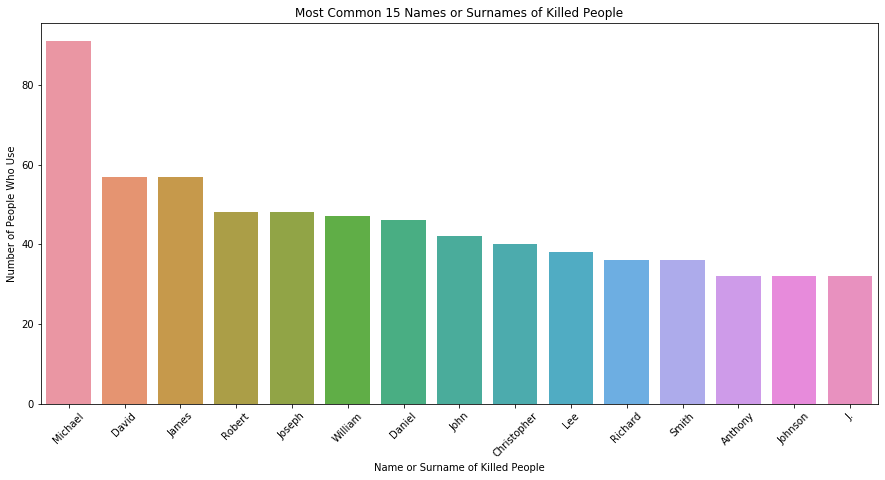

In [49]:
#aaa3 = pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x, y)
ax.set_title("Most Common 15 Names or Surnames of Killed People")
ax.set_ylabel('Number of People Who Use')
ax.set_xlabel('Name or Surname of Killed People')
ax.set_xticklabels(x, rotation=45);

In [52]:
first, last = zip(*pairs)

In [53]:
names = first + last

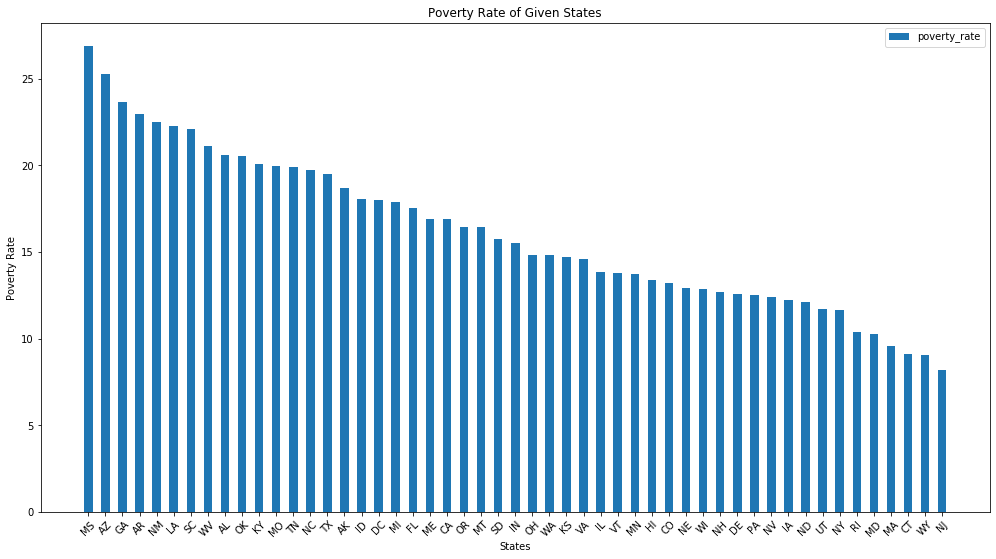

In [54]:
fig, axes = plt.subplots(figsize=(17,9))
axes.bar(aaa3.index, aaa3.values, width = 0.5, label = 'poverty_rate')
axes.set_title("Poverty Rate of Given States")
axes.set_xlabel('States')
axes.set_ylabel('Poverty Rate')
#axes.set_xticks(x_pos)
axes.set_xticklabels(aaa3.index, rotation=45)
axes.legend();

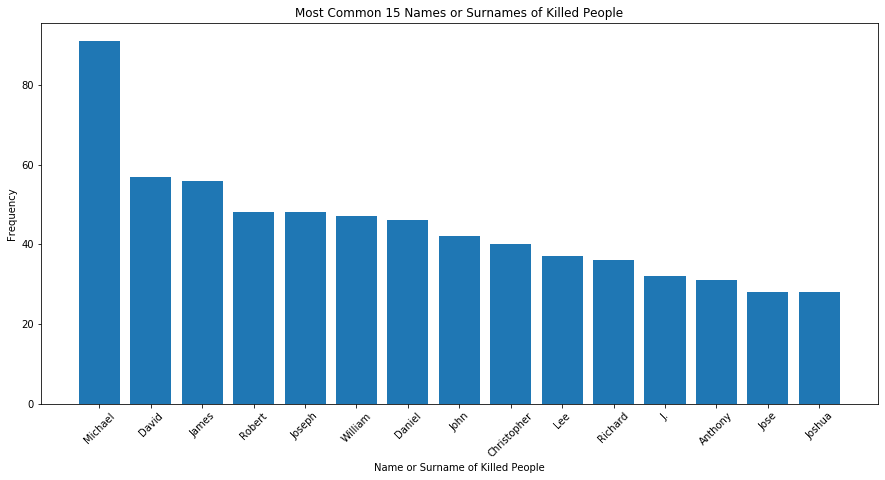

In [27]:
import collections
from collections import Counter

c = Counter(names)
c.most_common(15)
dd = dict(c.most_common(15))

fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(dd.keys(), dd.values())
#sns.barplot(x=dd.keys(), y = dd.values())
ax.set_title("Most Common 15 Names or Surnames of Killed People")
ax.set_ylabel('Frequency')
ax.set_xlabel('Name or Surname of Killed People')
ax.set_xticklabels(dd.keys(), rotation=45);


# 3. Killed People According to Races (Pie Chart)

In [55]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [56]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [57]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [58]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [59]:
#  INSTRUCTION-1: Drop the all raws that contain missing value (dropna)

In [60]:
# kill.dropna(subset = ['race', 'flee', 'age'], inplace = True)

In [61]:
kill.dropna(inplace = True)  # alternatif olarak

In [62]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

In [63]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

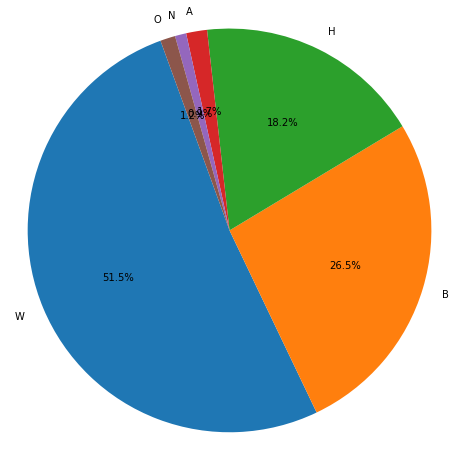

In [64]:
labels = 'W', 'B', 'H', 'A', 'N', 'O'
sizes = [1201, 618, 423, 39, 21, 28]
explode = (0, 0, 0, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=110, frame = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(8,8)
plt.show()

In [65]:
labels = kill.race.value_counts().index

In [66]:
sizes = kill.race.value_counts()

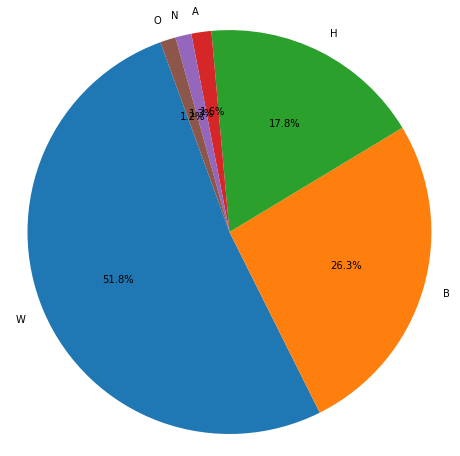

In [67]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=110, frame = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(8,8)
plt.show()

# 4a.Box plot of age in both genders separeted by manner of death.

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [38]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [39]:
#   INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.

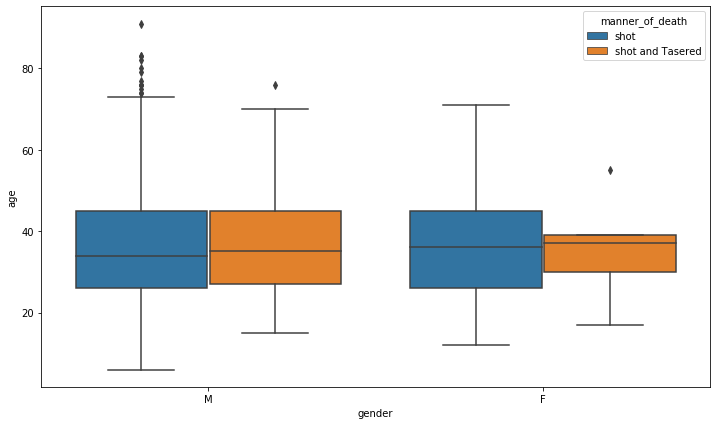

In [70]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(x = 'gender', y = 'age', hue = 'manner_of_death', data = kill);

# 4b. Swarm Plot (Do not use in large datasets. The memory will not be enough!)

In [41]:
#   INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.

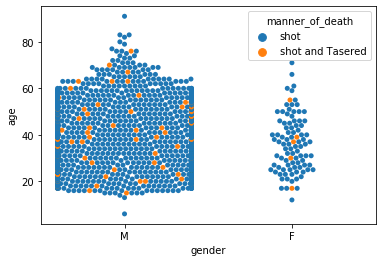

In [73]:
#fig, ax = plt.subplots(figsize=(10, 7))
sns.swarmplot(x = 'gender', y = 'age', hue = 'manner_of_death', data = kill);

# 5. Kill properties (Count Plots)

In [43]:
# INSTRUCTION-1: Plot number of poeple by gender

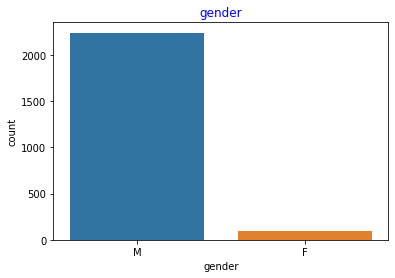

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("gender", color = 'b')
sns.countplot(x='gender', data = kill);

In [45]:
# INSTRUCTION-2: Plot 7 most common kill weapons

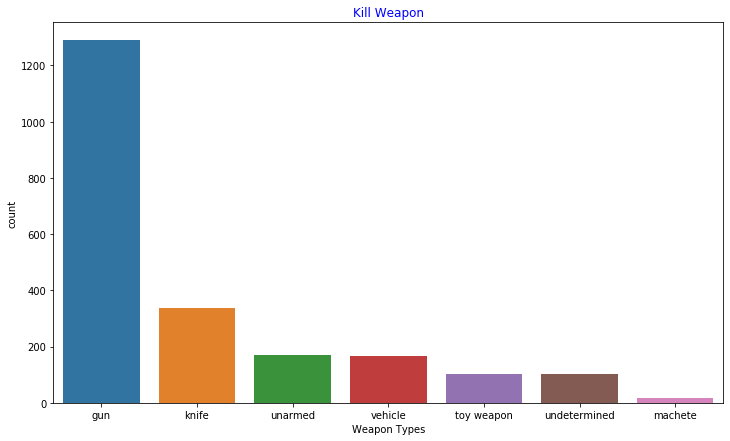

In [46]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Kill Weapon", color = 'b')
sns.countplot(x="armed", data = kill, order = kill.armed.value_counts().iloc[:7].index)
ax.set_xlabel('Weapon Types');

Barplot direkt siraya dizer

In [74]:
kek = kill.armed.value_counts()

In [81]:
aa = kill.armed.value_counts()[:7].index

In [82]:
bb = kill.armed.value_counts()[:7].values

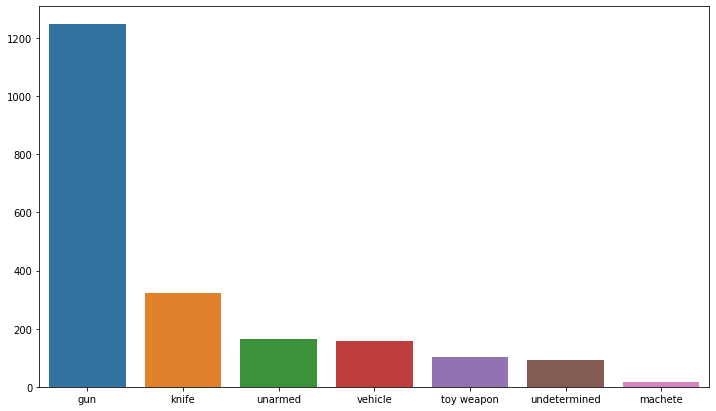

In [84]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(aa, bb);

In [47]:
# INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [91]:
a_25 = kill[kill['age'] >= 25]['age'].count()
b_25 = kill[kill['age'] < 25]['age'].count()
age = pd.Series([a_25, b_25], index = ['above 25', 'below 25'])

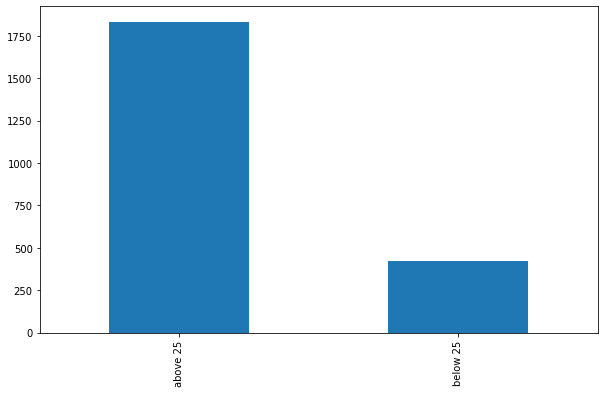

In [94]:
age.plot.bar(figsize = (10, 6));

In [95]:
kill['age_cat'] = kill.age.apply(lambda x: 'above25' if x>= 25 else 'below25')
# alternatif yontem olarak DF'te yeni bir column olusturuyoruz (age_cat) ve countplot ile ciziyoruz

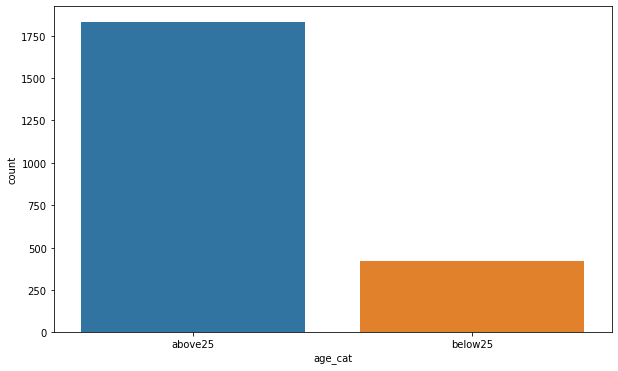

In [98]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot( x= 'age_cat', data = kill);

In [50]:
# INSTRUCTION-4: Plot number of killed poeple by race

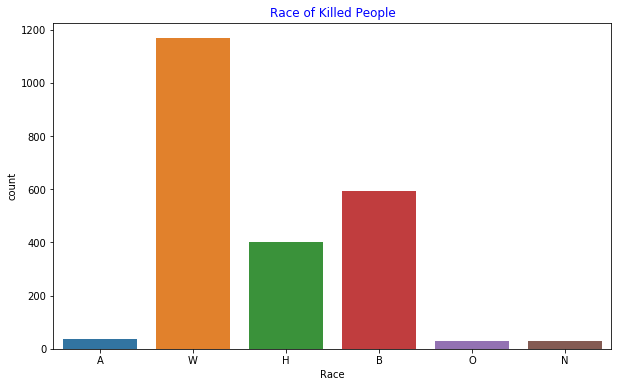

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='race', data = kill)
ax.set_title("Race of Killed People", color = 'b')
ax.set_xlabel('Race');

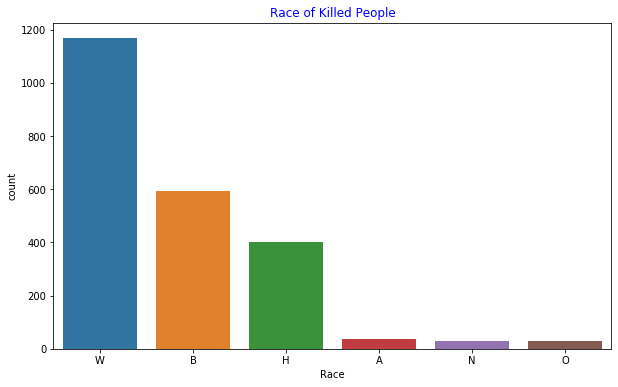

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='race', data = kill, order=kill.groupby("race").race.count().sort_values(ascending=False).index)
ax.set_title("Race of Killed People", color = 'b')
ax.set_xlabel('Race');

In [52]:
# INSTRUCTION-5: Plot 12 most dangerous cities

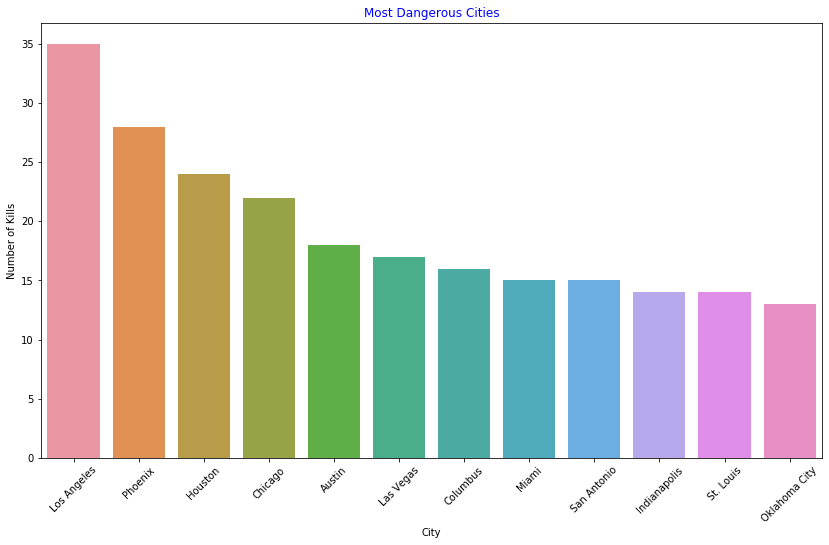

In [103]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_title("Most Dangerous Cities", color = 'b')
sns.countplot(x="city", data = kill, order = kill.city.value_counts().iloc[:12].index)
ax.set_xlabel('City')
ax.set_ylabel('Number of Kills')
plt.xticks(rotation = 45);

In [54]:
# INSTRUCTION-6: Plot 20 most dangerous states

In [105]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [106]:
kill.state.value_counts()

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
PA     45
AL     45
NY     43
VA     43
WI     42
NM     41
SC     41
IN     40
KY     40
MD     36
MI     36
NV     34
OR     32
MN     31
NJ     30
KS     24
MS     22
MA     22
UT     22
WV     21
AR     20
NE     14
AK     14
ID     14
IA     12
MT     11
HI     11
DC     11
ME     10
SD      9
DE      8
WY      7
NH      7
CT      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

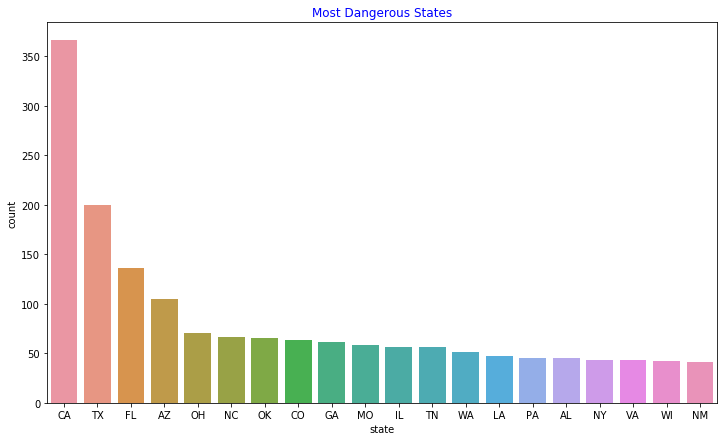

In [104]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Most Dangerous States", color = 'b')
sns.countplot(x="state", data = kill, order = kill.state.value_counts().iloc[:20].index);
#ax.set_xlabel('Weapon Types');

In [56]:
# INSTRUCTION-7: Plot Having mental ilness or not for killed people

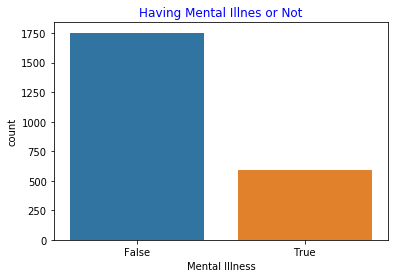

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='signs_of_mental_illness', data = kill)
ax.set_title("Having Mental Illnes or Not", color = 'b')
ax.set_xlabel('Mental Illness');

In [58]:
# INSTRUCTION-8: Plot number of Threat Types

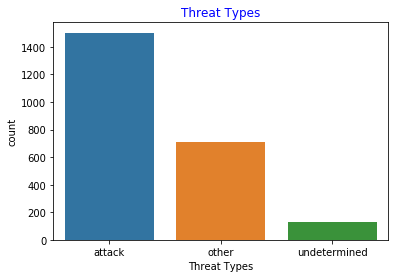

In [59]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='threat_level', data = kill)
ax.set_title("Threat Types", color = 'b')
ax.set_xlabel('Threat Types');

In [60]:
# INSTRUCTION-9: Plot number of Flee Types

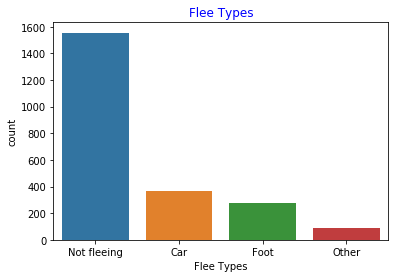

In [61]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='flee', data = kill)
ax.set_title("Flee Types", color = 'b')
ax.set_xlabel('Flee Types');